# Final LightGBM Model Training

### Data Importing

First we imported the updated dataset with the last matchday up to date. The imported data is already prepared, so, contains feature engineering, splitting and scaling, all included in the pipeline.

In [16]:
import sys
import numpy as np
import pandas as pd
import os
sys.path.append(os.path.abspath('..'))
from pipeline_test_lightgbm import get_train_val_test_scaled
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_val, X_test, y_train, y_val, y_test, cat_cols = get_train_val_test_scaled()

c:\Users\jmlar\OneDrive\Documentos\GitHub\ML_group_project\pipeline_test_lightgbm.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  db['odds_hw'] = db[home_win_cols].mean(axis=1)
c:\Users\jmlar\OneDrive\Documentos\GitHub\ML_group_project\pipeline_test_lightgbm.py:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  db['odds_d']  = db[draw_cols].mean(axis=1)
c:\Users\jmlar\OneDrive\Documentos\GitHub\ML_group_project\pipeline_test_lightgbm.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

In [17]:
X_train.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,...,draw_rate_away_L5,loss_rate_home_L5,loss_rate_away_L5,home_strength_diff,offensive_index_home,offensive_index_away,defensive_solidity_home,defensive_solidity_away,h2h_avg_home_goals_last_5,h2h_avg_away_goals_last_5
0,Arsenal,Leicester,1.489475,1.742906,D,M Dean,2.291235,-1.092832,1.987813,-0.464247,...,-0.056257,-0.708258,0.339823,NaN,0.750566,-0.276754,-0.554969,0.141170,0.001017,-0.00024
1,Brighton,Manchester City,-0.826703,-0.734302,D,M Oliver,-1.372740,0.455744,-1.084660,-0.045085,...,-0.535463,-0.218310,-1.088496,NaN,-0.014073,1.693558,0.319731,-1.565635,0.001017,-0.00024
2,Chelsea,Burnley,-0.826703,2.981510,A,C Pawson,0.895435,-0.318544,0.451576,0.374077,...,0.278330,-0.640251,0.050280,NaN,0.937550,-0.846491,-0.346461,-0.204483,0.001017,-0.00024
3,Crystal Palace,Huddersfield,-0.826703,1.742906,A,J Moss,0.023060,-0.705688,-0.316542,0.793239,...,-0.078799,0.087201,0.786775,NaN,-0.293282,-0.865142,0.145516,0.615515,0.001017,-0.00024
4,Everton,Stoke,0.331386,-0.734302,H,N Swarbrick,-0.849315,-0.512116,-0.316542,-1.302571,...,0.476925,-0.068527,0.714618,NaN,-0.489793,-0.729568,0.107574,0.558142,0.001017,-0.00024


In [18]:
X_train.columns

Index(['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS',
       'HST', 'AST',
       ...
       'draw_rate_away_L5', 'loss_rate_home_L5', 'loss_rate_away_L5',
       'home_strength_diff', 'offensive_index_home', 'offensive_index_away',
       'defensive_solidity_home', 'defensive_solidity_away',
       'h2h_avg_home_goals_last_5', 'h2h_avg_away_goals_last_5'],
      dtype='object', length=115)

### Model Training

In [19]:
# Train models separately for home and away goals
model_home = LGBMRegressor(random_state=42)
model_away = LGBMRegressor(random_state=42)

model_home.fit(X_train, y_train['FTHG'], categorical_feature=cat_cols)
model_away.fit(X_train, y_train['FTAG'], categorical_feature=cat_cols)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 3942, number of used features: 115
[LightGBM] [Info] Start training from score 1.552258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 3942, number of used features: 115
[LightGBM] [Info] Start training from score 1.329274


LGBMRegressor(random_state=42)

#### First training results

In [20]:
# Predictions
y_val_pred_home = model_home.predict(X_val)
y_val_pred_away = model_away.predict(X_val)
y_test_pred_home = model_home.predict(X_test)
y_test_pred_away = model_away.predict(X_test)

# Metrics function
def print_metrics(y_true_home, y_pred_home, y_true_away, y_pred_away, prefix=""):
    print(f"{prefix} Home Goals - MSE: {mean_squared_error(y_true_home, y_pred_home):.4f}, R²: {r2_score(y_true_home, y_pred_home):.4f}")
    print(f"{prefix} Away Goals - MSE: {mean_squared_error(y_true_away, y_pred_away):.4f}, R²: {r2_score(y_true_away, y_pred_away):.4f}")

print_metrics(y_val['FTHG'], y_val_pred_home, y_val['FTAG'], y_val_pred_away, prefix="Validation Metrics:")
print_metrics(y_test['FTHG'], y_test_pred_home, y_test['FTAG'], y_test_pred_away, prefix="Test Metrics:")

Validation Metrics: Home Goals - MSE: 0.0166, R²: 0.9908
Validation Metrics: Away Goals - MSE: 0.0170, R²: 0.9846
Test Metrics: Home Goals - MSE: 0.0980, R²: 0.9285
Test Metrics: Away Goals - MSE: 0.2818, R²: 0.7348


###  Hyperparameter Tuning

We performed hyperparameter tuning with RandomizedSearchCV while explicitly choosing time-series as the cv method in order to avoid data leakage.

#### Home Team Hyperparameter Tuning

In [21]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define time series cross-validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define model
model_home = LGBMRegressor(random_state=42)

# Define parameter grid (you can add more)
param_dist = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use negative MSE as scoring (lower is better)
def mse_scorer(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred)

scorer = make_scorer(mse_scorer)

# Setup randomized search
random_search = RandomizedSearchCV(
    estimator=model_home,
    param_distributions=param_dist,
    n_iter=30,           # number of parameter settings to try
    scoring=scorer,
    cv=tscv,  # time series cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train['FTHG'], categorical_feature=cat_cols)

print("Best params:", random_search.best_params_)
print("Best score (neg MSE):", random_search.best_score_)

# Use best model for predictions
best_model_home = random_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 3942, number of used features: 115
[LightGBM] [Info] Start training from score 1.552258
Best params: {'subsample': 0.6, 'num_leaves': 50, 'n_estimators': 300, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score (neg MSE): -0.6145773027504302


#### Away Team Hyperparameter Tuning

In [22]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define time series cross-validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define model
model_away = LGBMRegressor(random_state=42)

# Parameter distribution (same as for home, adjust if you want)
param_dist = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Negative MSE scorer (to minimize MSE)
def mse_scorer(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred)

scorer = make_scorer(mse_scorer)

# Randomized search setup
random_search_away = RandomizedSearchCV(
    estimator=model_away,
    param_distributions=param_dist,
    n_iter=30,
    scoring=scorer,
    cv=tscv, # time series cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data for away goals
random_search_away.fit(X_train, y_train['FTAG'], categorical_feature=cat_cols)

print("Best params (away):", random_search_away.best_params_)
print("Best score (neg MSE, away):", random_search_away.best_score_)

# Best model for away goals
best_model_away = random_search_away.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 3942, number of used features: 115
[LightGBM] [Info] Start training from score 1.329274
Best params (away): {'subsample': 0.8, 'num_leaves': 70, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best score (neg MSE, away): -0.5277543970560844


#### Model Training With Best Parameters

In [23]:
# Best params from tuning
best_params_home = {
    'subsample': 0.6,
    'num_leaves': 50, 
    'n_estimators': 500,
    'min_child_samples': 10,
    'max_depth': 20,
    'learning_rate': 0.05,
    'colsample_bytree': 0.8,
    'random_state': 42
}

best_params_away = {
    'subsample': 0.8,
    'num_leaves': 70,
    'n_estimators': 500,
    'min_child_samples': 30,
    'max_depth': 20,
    'learning_rate': 0.01,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Initialize models
model_home = LGBMRegressor(**best_params_home)
model_away = LGBMRegressor(**best_params_away)

# Fit models
model_home.fit(X_train, y_train['FTHG'], categorical_feature=cat_cols)
model_away.fit(X_train, y_train['FTAG'], categorical_feature=cat_cols)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 3942, number of used features: 115
[LightGBM] [Info] Start training from score 1.552258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 3942, number of used features: 115
[LightGBM] [Info] Start training from score 1.329274


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=20,
              min_child_samples=30, n_estimators=500, num_leaves=70,
              random_state=42, subsample=0.8)

#### Hyperparameter Tuning Metrics and Sample Predictions

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predictions
y_val_pred_home = model_home.predict(X_val)
y_val_pred_away = model_away.predict(X_val)
y_test_pred_home = model_home.predict(X_test)
y_test_pred_away = model_away.predict(X_test)

# Metrics function with MAE
def print_metrics(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{label} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

print("Validation Metrics:")
print_metrics(y_val['FTHG'], y_val_pred_home, "Home Goals")
print_metrics(y_val['FTAG'], y_val_pred_away, "Away Goals")

print("\nTest Metrics:")
print_metrics(y_test['FTHG'], y_test_pred_home, "Home Goals")
print_metrics(y_test['FTAG'], y_test_pred_away, "Away Goals")

# Sample predictions dataframe
sample_df = pd.DataFrame({
    'Actual_FTHG': y_test['FTHG'],
    'Pred_FTHG': y_test_pred_home,
    'Actual_FTAG': y_test['FTAG'],
    'Pred_FTAG': y_test_pred_away
}).head(10)

print("\nSample Predictions on Test Set:")
print(sample_df)


Validation Metrics:
Home Goals - MSE: 0.0003, R²: 0.9998, MAE: 0.0142
Away Goals - MSE: 0.0139, R²: 0.9874, MAE: 0.0957

Test Metrics:
Home Goals - MSE: 0.0749, R²: 0.9454, MAE: 0.1283
Away Goals - MSE: 0.2694, R²: 0.7465, MAE: 0.2698

Sample Predictions on Test Set:
      Actual_FTHG  Pred_FTHG  Actual_FTAG  Pred_FTAG
3992            2   2.034930            1   1.025571
3993            2   2.018567            2   1.928665
3994            1   0.980054            0   0.109676
3995            3   2.983551            2   1.889426
3996            3   2.990873            0   0.030621
3997            1   1.001459            2   1.963904
3998            3   3.005447            0   0.157802
3999            1   0.994447            1   0.870968
4000            5   4.994784            1   1.054808
4001            0   0.021806            2   1.864767


#### Combined Results

In [25]:
pred_home = model_home.predict(X_test)
pred_away = model_away.predict(X_test)
y_pred = np.column_stack([pred_home, pred_away])

y_true = y_test[['FTHG', 'FTAG']].values

mse_home = mean_squared_error(y_true[:, 0], y_pred[:, 0])
mse_away = mean_squared_error(y_true[:, 1], y_pred[:, 1])
r2_home = r2_score(y_true[:, 0], y_pred[:, 0])
r2_away = r2_score(y_true[:, 1], y_pred[:, 1])
mae_home = mean_absolute_error(y_true[:, 0], y_pred[:, 0])
mae_away = mean_absolute_error(y_true[:, 1], y_pred[:, 1])

mse_combined = np.mean([mse_home, mse_away])
r2_combined = np.mean([r2_home, r2_away])
mae_combined = np.mean([mae_home, mae_away])

print(f"Home MSE: {mse_home:.4f}, Away MSE: {mse_away:.4f}, Combined MSE: {mse_combined:.4f}")
print(f"Home R²:  {r2_home:.4f}, Away R²:  {r2_away:.4f},  Combined R²:  {r2_combined:.4f}")
print(f"Home MAE: {mae_home:.4f}, Away MAE: {mae_away:.4f}, Combined MAE: {mae_combined:.4f}")


Home MSE: 0.0749, Away MSE: 0.2694, Combined MSE: 0.1721
Home R²:  0.9454, Away R²:  0.7465,  Combined R²:  0.8459
Home MAE: 0.1283, Away MAE: 0.2698, Combined MAE: 0.1991


### Visualizing Results

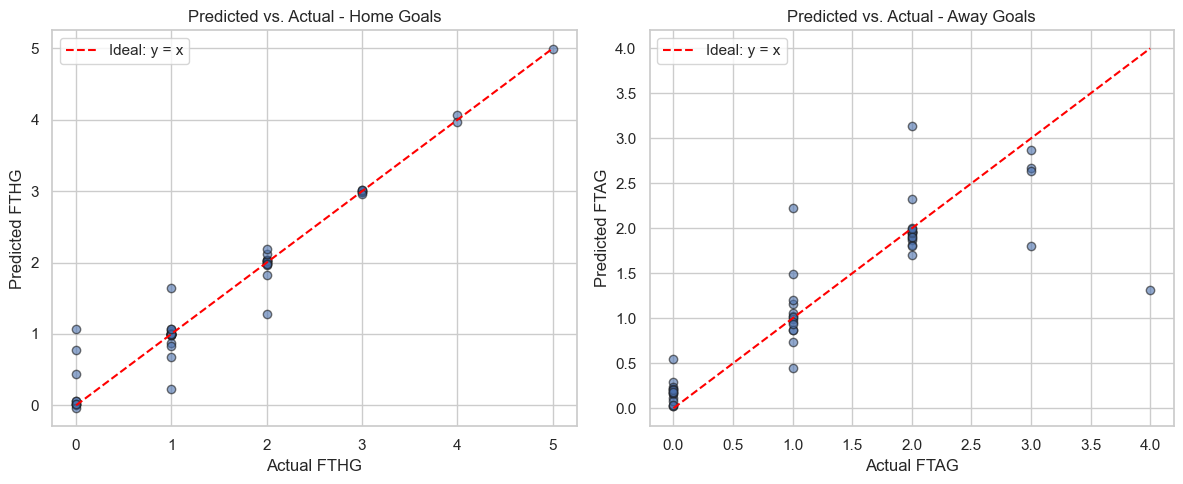

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot for FTHG (Home Goals)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['FTHG'], y_test_pred_home, alpha=0.6, edgecolors='k')
plt.plot([y_test['FTHG'].min(), y_test['FTHG'].max()],
         [y_test['FTHG'].min(), y_test['FTHG'].max()],
         color='red', linestyle='--', label='Ideal: y = x')
plt.xlabel("Actual FTHG")
plt.ylabel("Predicted FTHG")
plt.title("Predicted vs. Actual - Home Goals")
plt.legend()
plt.grid(True)

# Plot for FTAG (Away Goals)
plt.subplot(1, 2, 2)
plt.scatter(y_test['FTAG'], y_test_pred_away, alpha=0.6, edgecolors='k')
plt.plot([y_test['FTAG'].min(), y_test['FTAG'].max()],
         [y_test['FTAG'].min(), y_test['FTAG'].max()],
         color='red', linestyle='--', label='Ideal: y = x')
plt.xlabel("Actual FTAG")
plt.ylabel("Predicted FTAG")
plt.title("Predicted vs. Actual - Away Goals")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


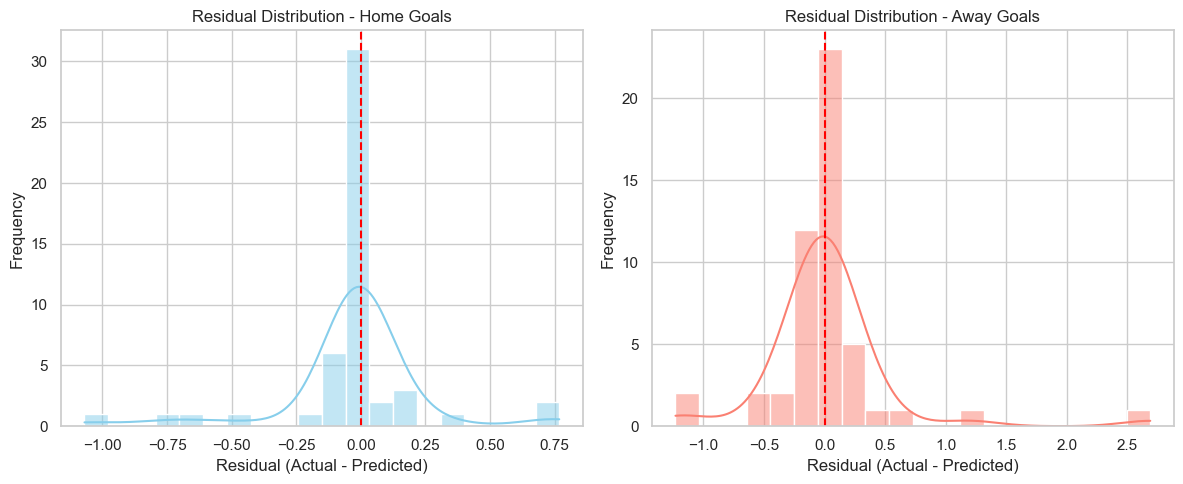

In [27]:
# Calculate residuals
residuals_home = y_test['FTHG'] - y_test_pred_home
residuals_away = y_test['FTAG'] - y_test_pred_away

# Plot histogram of residuals
plt.figure(figsize=(12, 5))

# Home Goals Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_home, bins=20, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution - Home Goals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")

# Away Goals Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_away, bins=20, kde=True, color='salmon')
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution - Away Goals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Time-Series Cross-Validation

In [28]:
tscv = TimeSeriesSplit(n_splits=5)

# Storage for metrics
mse_home, mae_home, r2_home = [], [], []
mse_away, mae_away, r2_away = [], [], []

# Use only training data for cross-validation
X = X_train.reset_index(drop=True)
y_ = y_train.reset_index(drop=True)

# Convert targets
y_home = y_[["FTHG"]].values.ravel()
y_away = y_[["FTAG"]].values.ravel()

# Loop through folds
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_home, y_val_home = y_home[train_index], y_home[val_index]
    y_train_away, y_val_away = y_away[train_index], y_away[val_index]
    
    # Train models
    model_home = LGBMRegressor(random_state=42)
    model_away = LGBMRegressor(random_state=42)
    model_home.fit(X_train, y_train_home)
    model_away.fit(X_train, y_train_away)
    
    # Predictions
    pred_home = model_home.predict(X_val)
    pred_away = model_away.predict(X_val)
    
    # Metrics
    mse_home.append(mean_squared_error(y_val_home, pred_home))
    mae_home.append(mean_absolute_error(y_val_home, pred_home))
    r2_home.append(r2_score(y_val_home, pred_home))

    mse_away.append(mean_squared_error(y_val_away, pred_away))
    mae_away.append(mean_absolute_error(y_val_away, pred_away))
    r2_away.append(r2_score(y_val_away, pred_away))

# Report average metrics
print("Home Goals CV Results:")
print(f"Avg R²: {np.mean(r2_home):.4f}, Avg MSE: {np.mean(mse_home):.4f}, Avg MAE: {np.mean(mae_home):.4f}")

print("\nAway Goals CV Results:")
print(f"Avg R²: {np.mean(r2_away):.4f}, Avg MSE: {np.mean(mse_away):.4f}, Avg MAE: {np.mean(mae_away):.4f}")

# Optionally compute combined metrics
combined_mse = np.mean([np.mean(mse_home), np.mean(mse_away)])
combined_mae = np.mean([np.mean(mae_home), np.mean(mae_away)])
combined_r2 = np.mean([np.mean(r2_home), np.mean(r2_away)])

print("\nCombined Metrics:")
print(f"Avg R²: {combined_r2:.4f}, Avg MSE: {combined_mse:.4f}, Avg MAE: {combined_mae:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4176
[LightGBM] [Info] Number of data points in the train set: 657, number of used features: 66
[LightGBM] [Info] Start training from score 1.549467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

#### CV Results

Even though the average R<sup>2</sup> is lower than the test set results with hyperparameter tuning, the plow below shows the evolution of the R<sup>2</sup> scores across splits, which with time improves

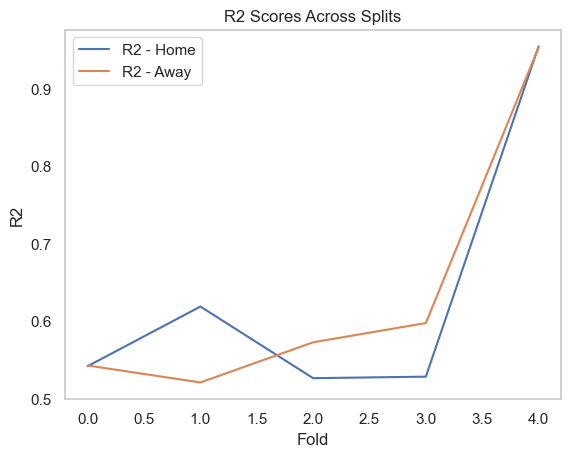

In [29]:
import matplotlib.pyplot as plt

plt.plot(r2_home, label='R2 - Home')
plt.plot(r2_away, label='R2 - Away')
plt.title('R2 Scores Across Splits')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()
plt.grid()
plt.show()
